# EDA

In [129]:
import pandas as pd
import numpy as np

### Добавил Российский индекс волатильности RVI к признакам

In [130]:
df = pd.read_excel('BST_DataSet.xlsx')
rvi = pd.read_csv('candles.csv', sep=';',  skiprows = 1)
# rvi_ = pd.read_csv('security.csv', sep=';')

In [131]:
df= df.rename(columns={'Unnamed: 0':'Дата'})
df

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5062.700000,20011.900000,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,4830.700000,19307.700000,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,4898.000000,19536.700000,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,4918.200000,19788.700000,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5071.300000,20020.800000,27.87,22779
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,8034.188296,39275.911028,59.65,37099
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,8066.772110,39419.314228,57.73,38047
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,8089.527215,39570.988535,57.71,38333
82,2017-11-01,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,8071.528889,39667.451690,58.92,38848


In [132]:
rvi

,open,close,high,low,value,volume,begin,end
0,17.94,18.54,21.23,14.91,0,0,2017-12-01 00:00:00,2017-12-29 00:00:00
1,16.66,17.83,21.47,14.35,0,0,2017-11-01 00:00:00,2017-11-30 00:00:00
2,17.46,17.07,18.28,13.80,0,0,2017-10-01 00:00:00,2017-10-31 00:00:00
3,19.84,17.90,21.34,15.92,0,0,2017-09-01 00:00:00,2017-09-30 00:00:00
4,22.96,19.80,23.50,17.88,0,0,2017-08-01 00:00:00,2017-08-31 00:00:00
5,22.27,22.64,25.45,18.38,0,0,2017-07-01 00:00:00,2017-07-31 00:00:00
6,25.80,22.55,30.92,21.29,0,0,2017-06-01 00:00:00,2017-06-30 00:00:00
7,22.11,25.93,27.41,21.01,0,0,2017-05-01 00:00:00,2017-05-31 00:00:00
8,24.07,22.47,26.90,21.72,0,0,2017-04-01 00:00:00,2017-04-30 00:00:00
9,27.23,23.97,29.38,20.19,0,0,2017-03-01 00:00:00,2017-03-31 00:00:00


In [133]:
df.dtypes

Дата                                                 datetime64[ns]
Прирост вкладов физических лиц в рублях (млн руб)           float64
Доходность ОФЗ по сроку до 1 года                           float64
Ключевая ставка                                             float64
Ставка по вкладам в долларах до 1 года                      float64
Ставка по вкладам в рублях до 1 года                        float64
Нефть марки Юралс, долл./барр                               float64
Индекс потребительских цен, ед.                             float64
М0, млрд руб                                                float64
М2, млрд руб                                                float64
Курс доллара к рублю, руб                                   float64
Номинальная средняя з/п, руб                                  int64
dtype: object

In [134]:
rvi.dtypes

open      float64
close     float64
high      float64
low       float64
value       int64
volume      int64
begin      object
end        object
dtype: object

In [135]:
rvi = rvi.drop(columns=['end','value', 'volume'])

In [136]:
rvi['begin'] = pd.to_datetime(rvi['begin'],
               format='%Y-%m-%d %H:%M:%S.%f')
rvi = rvi.rename(columns={'begin':'Дата'})

In [137]:
rvi

,open,close,high,low,Дата
0,17.94,18.54,21.23,14.91,2017-12-01
1,16.66,17.83,21.47,14.35,2017-11-01
2,17.46,17.07,18.28,13.80,2017-10-01
3,19.84,17.90,21.34,15.92,2017-09-01
4,22.96,19.80,23.50,17.88,2017-08-01
5,22.27,22.64,25.45,18.38,2017-07-01
6,25.80,22.55,30.92,21.29,2017-06-01
7,22.11,25.93,27.41,21.01,2017-05-01
8,24.07,22.47,26.90,21.72,2017-04-01
9,27.23,23.97,29.38,20.19,2017-03-01


In [138]:
df_left = df.merge(rvi, on='Дата', how = 'left')

### от 2011 до 2013-11 не буду использовать данные т.к. RVI тех лет отсутствует + последние данные являются более актуальными для исследования

In [139]:
df = df.merge(rvi, on='Дата', how = 'inner')

In [140]:
df.dtypes

Дата                                                 datetime64[ns]
Прирост вкладов физических лиц в рублях (млн руб)           float64
Доходность ОФЗ по сроку до 1 года                           float64
Ключевая ставка                                             float64
Ставка по вкладам в долларах до 1 года                      float64
Ставка по вкладам в рублях до 1 года                        float64
Нефть марки Юралс, долл./барр                               float64
Индекс потребительских цен, ед.                             float64
М0, млрд руб                                                float64
М2, млрд руб                                                float64
Курс доллара к рублю, руб                                   float64
Номинальная средняя з/п, руб                                  int64
open                                                        float64
close                                                       float64
high                                            

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

### Посмотрю корелляции между переменными

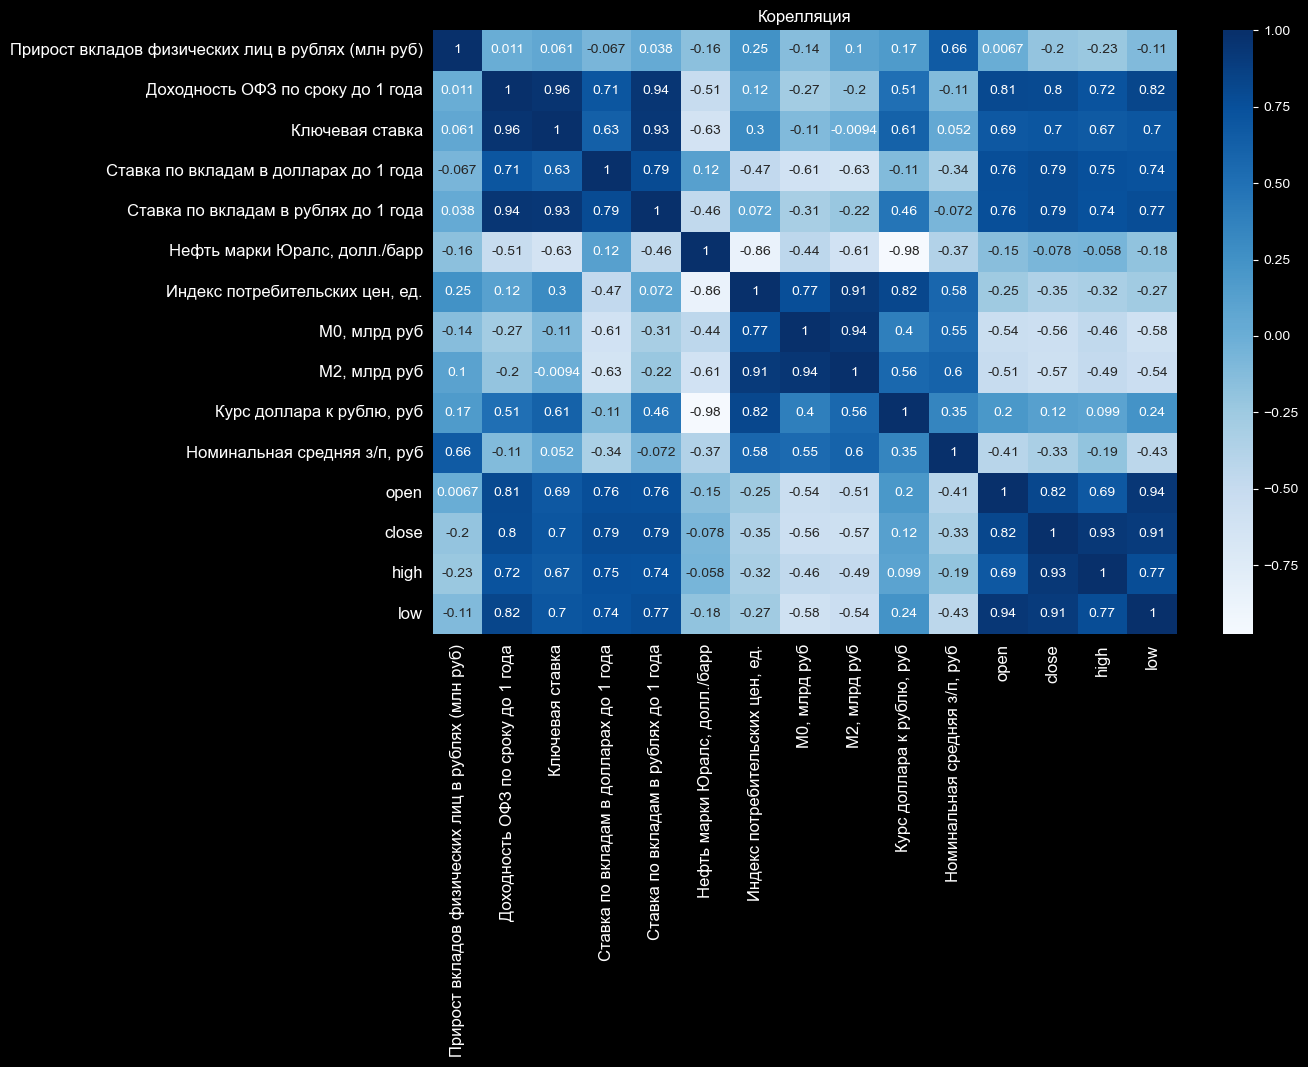

In [142]:
plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True, cmap = 'Blues')
plt.title('Корелляция')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# plt.savefig('corrall.png', dpi=1000)

In [143]:
df

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",open,close,high,low
0,2013-11-01,142125.0,6.154000,5.50,2.10,5.00,108.08,124.207680,6419.000000,28276.400000,32.64,30290,23.80,23.80,24.43,20.98
1,2013-12-01,764180.0,6.242857,5.50,2.30,5.10,110.63,124.841140,6564.100000,28873.300000,32.89,39648,23.83,20.48,26.49,17.33
2,2014-01-01,-567448.0,6.183684,5.50,2.01,5.30,107.57,125.577700,6985.600000,31155.600000,33.46,29535,20.47,27.48,29.04,17.18
3,2014-02-01,77197.0,6.356500,5.50,1.84,5.09,108.81,126.456750,6663.100000,29861.200000,35.22,29255,27.47,28.38,29.84,24.37
4,2014-03-01,-303341.0,7.397500,7.00,1.66,5.07,107.41,127.746600,6699.900000,30169.000000,36.21,31486,28.35,38.84,70.63,27.88
5,2014-04-01,300439.0,7.447273,7.50,1.87,5.18,107.88,128.896320,6608.200000,29519.300000,35.66,32947,38.97,41.35,49.11,32.88
6,2014-05-01,8596.0,7.932000,7.50,1.78,5.19,109.68,130.056390,6776.800000,29879.200000,34.93,32272,41.10,27.81,43.91,27.16
7,2014-06-01,183236.0,7.906842,7.50,1.83,5.33,111.87,130.862740,6763.100000,29890.800000,34.41,33726,28.10,30.31,30.65,24.62
8,2014-07-01,96407.0,8.294783,8.00,1.58,5.54,106.98,131.503970,6762.198000,30071.800000,34.64,32515,31.10,35.83,38.53,25.65
9,2014-08-01,133248.0,8.596667,8.00,1.77,5.63,101.92,131.819580,6871.200000,30178.300000,36.11,30763,36.57,35.02,41.62,29.98


### Визуализирую корелляцию между номинальной средней з/п и приростом вкладов

In [144]:
df['salary_bin'] = pd.qcut(df['Номинальная средняя з/п, руб'],4)

<AxesSubplot:xlabel='salary_bin'>

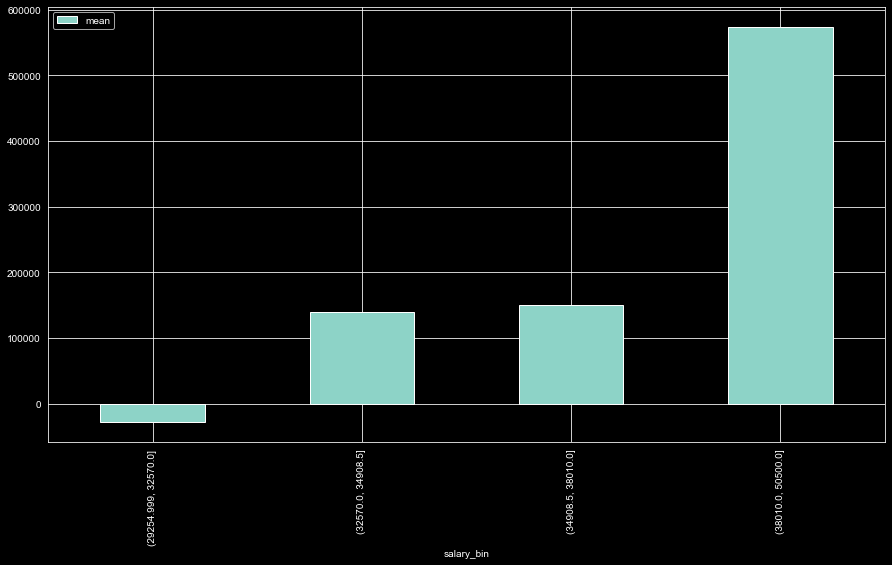

In [145]:
df.groupby('salary_bin',dropna=False)['Прирост вкладов физических лиц в рублях (млн руб)']\
    .agg(['mean']).plot(figsize=(15,8), kind = 'bar')

In [146]:
df.columns

Index(['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, млрд руб', 'М2, млрд руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб', 'open',
       'close', 'high', 'low', 'salary_bin'],
      dtype='object')

<AxesSubplot:xlabel='Индекс потребительских цен, ед.'>

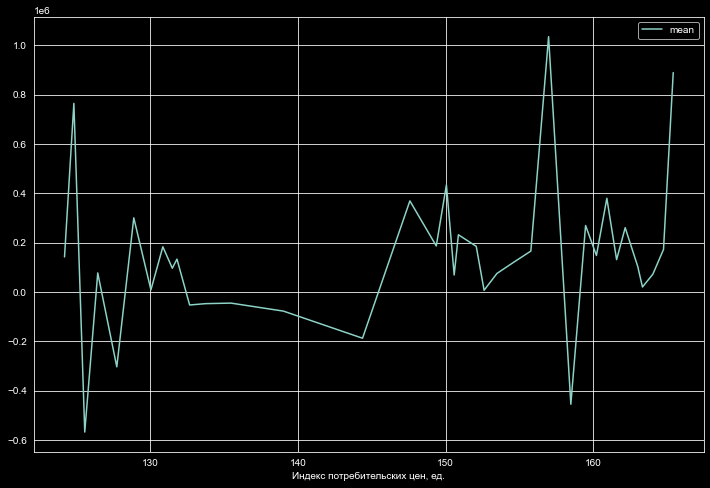

In [147]:
df.groupby('Индекс потребительских цен, ед.',dropna=False)['Прирост вкладов физических лиц в рублях (млн руб)'] \
    .agg(['mean']).plot(figsize=(12,8))

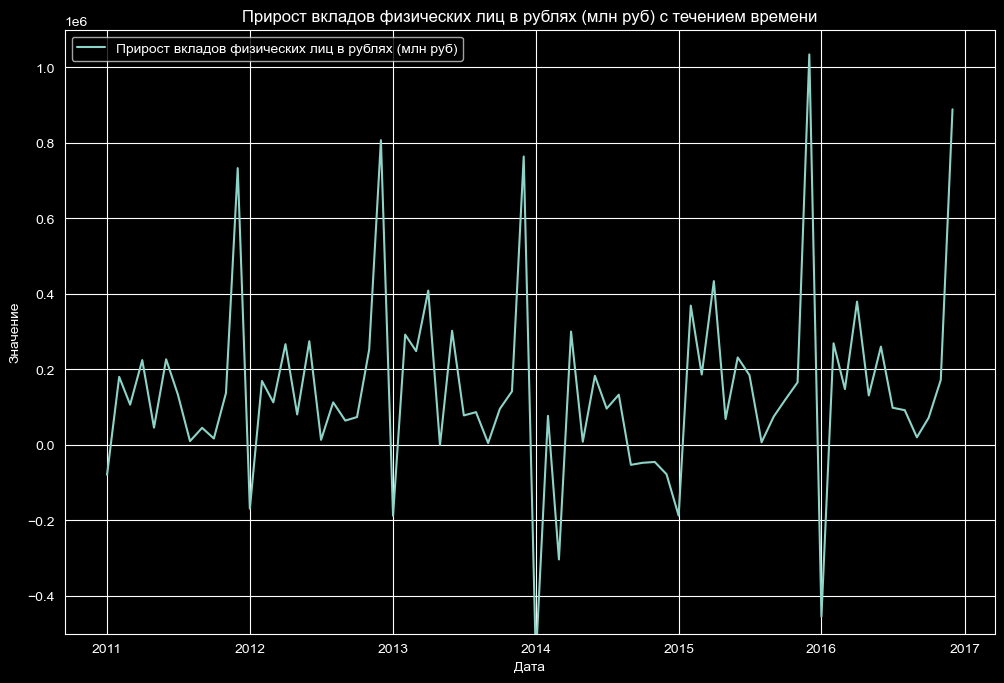

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi= 100)

# Построение графика
# plt.plot(df['Дата'], df['Номинальная средняя з/п, руб'], label='Номинальная средняя з/п, руб')
plt.plot(df_left['Дата'], df_left['Прирост вкладов физических лиц в рублях (млн руб)'], label='Прирост вкладов физических лиц в рублях (млн руб)')
plt.ylim(-500000, 1100000)
# Настройки графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Прирост вкладов физических лиц в рублях (млн руб) с течением времени')
plt.legend()

# Отображение графика
plt.show()


In [149]:
from prophet import Prophet

In [150]:
df_ = df_left[['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)']]
df_

,Дата,Прирост вкладов физических лиц в рублях (млн руб)
0,2011-01-01,-79049.0
1,2011-02-01,180475.0
2,2011-03-01,106845.0
3,2011-04-01,224890.0
4,2011-05-01,45856.0
...,...,...
79,2017-08-01,NaN
80,2017-09-01,NaN
81,2017-10-01,NaN
82,2017-11-01,NaN


In [151]:
df_ = df_.rename(columns={'Дата':'ds', 'Прирост вкладов физических лиц в рублях (млн руб)':'y'})
df_

,ds,y
0,2011-01-01,-79049.0
1,2011-02-01,180475.0
2,2011-03-01,106845.0
3,2011-04-01,224890.0
4,2011-05-01,45856.0
...,...,...
79,2017-08-01,NaN
80,2017-09-01,NaN
81,2017-10-01,NaN
82,2017-11-01,NaN


### Проанализирую временные ряды с помощью библиотеки Prophet(+мини-прогноз, который вряд ли схож с дейстивтельнсотью)

In [152]:
m = Prophet()
m.fit(df_)

20:13:44 - cmdstanpy - INFO - Chain [1] start processing
20:13:44 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
444,2018-11-27
445,2018-11-28
446,2018-11-29
447,2018-11-30
448,2018-12-01


In [154]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
444,2018-11-27,446524.415969,266827.244281,602325.037887
445,2018-11-28,494205.442967,311675.128174,675108.264509
446,2018-11-29,550874.785617,371359.434847,715007.763605
447,2018-11-30,615825.144608,433873.457588,780094.312647
448,2018-12-01,688065.740410,516850.610177,855166.348957


In [155]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [156]:
plot_components_plotly(m, forecast)

### В декабре пик, в январе резкий спад

In [157]:
from catboost import Pool, CatBoostRegressor